In [2]:
# установить свежую версию
!pip install scipy==1.5.2

     |████████████████████████████████| 25.9MB 168kB/s 
ERROR: tensorflow 2.3.0 has requirement scipy==1.4.1, but you'll have scipy 1.5.2 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


In [72]:
import math
import numpy as np
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt 

#### Введение

В данном ноутбуке рассматриваются для **проверки гипотезы о законе распределения**, **в случае простых гипотез**.

Критерии используемые для проверки гипотезы о законе распределения генеральной совокупности, называют ещё **критериями согласия**.

**Этапы**

*  выдвижение гипотезы о виде закона распределения
*  оценка параметров распределения
*  проверка гипотезы о законе распределения

Конкурентов у выдвинутого закона распределения может быть много, например, для нормального закона распределения конкурирующим распределениями можгут быть распределения Стьюдента, логистическое, Коши. 

В случае, когда закон распределения задан однозначно, т.е. все параметры распределения нам известны, в этом случае мы будем иметь дело с **простой гипотезой** и использовать критерии согласия для простых гипотез.

Если закон распределения не задан однозначно, а известно только семейство распределения, то будем иметь дело с **сложной гипотезой** использовать критери согласия для сложных гипотез.

#### Виды критерия согласия

#### Критерии согласия для простых гипотез

##### Гипотеза

Рассмотрим ген. совокупность $\xi$, выборку $X_{[n]}$.

$H_0: F_{\xi}(x) = F_0(x)$

$H_0: F_{\xi}(x) \neq F_0(x)$

ф-я $F_0(x)$ задана однозначно.

Критерии согласия, основанные на сравнении

* теоритической плотности распределения и гистограммы
* теоритической и эмперической функций распределения

##### Критерия согласия хи-квадрат для простой гипотезы. Критерий согласия Пирсона

##### Случаи использования

Используют в любых ситуациях. Очень мощный критерий!

##### Введение

Критерий $\chi^2$ основан на справнении теоритической плотности распределения и гистограммы, либо теоритической вероятностной меры и полигона частот.

Сл. вел. $\xi$ может быть непрерывной сл. вел и дискретной сл. вел., без разницы.

Разобъем множество значений сл. вел. $\xi$ на $r$ интервалов $\Delta_1, ..., \Delta_r:$ $\Delta_i = (a_{i-1}, a_i], i = \overline {1,r}$. данные интервалы не пересекаются и покрывают всё множество возможных значений сл. вел. $\xi$.

Границы обозначим через $a_o$ - левая граница, $a_r$ - правая граница.

Обозначим через $p_i$ теоритическую вероятность попадания сл. вел. $\xi$ в интервал $\Delta_i$, при условии, что справедлива $H_0$.

$p_i = P(\xi \in \Delta_i|H_0) = F_0(a_i) - F_0(a_i - 1)$

Через $n_i$ обозначим число наблюдений нашей выборки, попавших в соответветствующий интервал $\Delta_i$.

$n_i = num(x_j \in \Delta_i)$

###### Статистика критерия

Статистика критерия основана на сравнении относительной частоты и теоритической.

$\chi^2(X_{[n]}) = \sum \limits_{i=1}^r \frac{n}{p_i} \bigg ( \frac{n_i}{n} - p_i \bigg )^2 = \sum \limits_{i=1}^r \frac{(n_i - p_i n)^2}{n p_i} \sim \chi^2_{r-1}$

###### Scipy

Вычислить её с помощь Scipy



In [ ]:
ni = np.array([5, 7, 9]) # массив кол-ва элементов в интервале
pi = np.array([0.1, 0.8, 0.1]) # вероятность попасть в интервал
n = 3
# первой идёт выборочная статистика критерия
st.chisquare(ni, n*pi)

Power_divergenceResult(statistic=334.7499999999999, pvalue=2.0415550330242583e-73)

###### Теорема Пирсона

Если $H_0$ верна, тогда

$\chi^2(X_{[n]}) \xrightarrow[n \rightarrow \infty]{d} \zeta \sim \chi^2_{(r - 1)}$

это означает, что при достаточно больших $n$ закон распределения статистики критерия приближенно равен $\chi^2$ с $(r-1)$ степенями свободы и данное распределение мы можем использовать для построения критической области.

В основе статистики $\chi^2$ лежит сл. вел. 

$\frac{n_i - p_i n}{\sqrt{n p_i}} \sim N(0,1)$

теория и практика показывают, что для того, чтобы выполнялось данное условие необходимо, чтобы для каждого интервала $\Delta_i$ ожидаемые частоты были не меньше 5, т.е. $\Delta_i: np_i \geq 5$.

В случае, если это условие не выполняется, то надо объединять соседние интервалы.

Почему у нас $r-1$ степеней свободы, а не $r$, это связано с тем, что у нас наблюдения $n_i, ..., n_r$ связаны между собой и связаны они соотношением $\sum \limits_{i=1}^r n_i = n$, т.е. у нас есть одно уравнение связи, зная $n$ и все кроме одной $n_i$ мы можем выразить искомую $n_j$.

###### Критическая область и p-value

Зададим уровень значимости $\alpha \in (0,1)$

$V_k = (\chi^2_{1 - \alpha, r-1}, + \infty)$

$p_{value} = 1 - F_{\chi^2}(\chi^2(X_{[n]})$, где 

$\chi^2(X_{[n]})$ - выборочное значение статистики критерия $\chi^2$

$\chi^2(X_{[n]}) \in V_k \Rightarrow H_0$ отвергается.

$p_{value} < \alpha \Rightarrow H_0$ отвергается.

###### Пример

В автобусном парке ежедневно фиксировалось число автобусов сошедших с линии из-за поломок. Требуется проверить гипотезу о том, что число сошедших автобусов в течение дня, подчиняется закону распределения Пуассона с мат. ож. $a = 1$.

$i$    0,  1,  2,  3,  4,  5,  $\geq 6$

$n_i$ 70, 78, 34, 13,  4,  1,  0

где $i$ - число поломок в течение дня, $n_i$ - кол-во раз, сколько наблюдалось поломок в течение дня. Например, $i = 1$ наблюдалась одна поломка, $n_i=78$ наблюдалась одна поломка 78 раз. 

$n = 200$

**Решение:**

$H_0: \xi \sim Pois(1)$

$H_1: \xi \neq Pois(1)$

Разобъем множество всех возможных значений сл. вел. $\xi$ на интервалы. Т.к. $\xi$ является дискретной сл. вел., мы возьмем интервалы, которые совпадают с его значениями

$\Delta_0 = 0, \Delta_1 = 1, ..., \Delta_5 = 5, \Delta_6 = [6, + \infty)$

Найдём верятности попадания сл. вел. $\xi$ в построенные интервалы. 

$p_k = P(\xi = k) = \frac{\lambda}{k!} e^{- \lambda}$

$p_0 = 0.368, p_1 = 0.368, p_2 = 0.184, p_3 = 0.061, p_4 = 0.015, p_5 = 0.003, p_{\geq 6} = 0.001$

$\sum \limits_{i=0}^6 p_i = 1$

Обратим внимание, что $n p_4 = 200 * 0.015 = 3$, что меньше 5. А нам нужно соблюсти условие $n p_i \geq 5$.

Аналогично $np_5 < 5$, $np_{\geq6} < 5$, поэтому данные интервалы следует объединить с интервалом $\Delta_3$.

Откорректируем интервалы, получим

$\Delta_0, \Delta_1, \Delta_2, \Delta_3 = [3 \geq + \infty)$

$\;\;\;\;$ $\Delta_0$, $\Delta_1$, $\Delta_2$, $\Delta_{\geq 3}$

$i$ $\;\;$  0,  $\;\;$1,   $\;\;\;$2,  $\;\geq3$

$n_i$ $\;$70, 78, 34, $\;$18

$p_i$ 0.368, 0.368, 0.184, 0.08

$np_i$ 73.6, 73.6, 36.8, 16

$\frac{(n_i - np_i)^2}{np_i}$ 0.18, 0.26, 0.21, 0.25

$\chi^2_в = \sum \frac{(n_i - np_i)^2}{np_i} = 0.9$

где 

$np_i$ ожидаемые частоты попадания в интервал.

$\alpha = 0.05$

Найдём квантиль распределения $\chi^2_{1 - \alpha, r - 1}$, где

$r$ - кол-во интервалов.

$\chi^2_{1 - 0.05, 4 - 1} = 7.8$

$\chi^2_в < \chi^2_{0.95, 3}  \Rightarrow H_0$ не отвергается.

или, что тоже самое

$V_k = (7.8, + \infty)$

$\chi^2_в \notin V_k \Rightarrow H_0$ не отвергается.


**Ответ:**

$H_0$ не отвергается.

###### Задача №1

Исследователь Василий по выборке

0.29 0.01 0.50 0.21 0.65 0.34 0.75 0.07 0.07 0.25 1.26 0.11 0.22 0.95 0.63 0.93 0.73 0.37 0.80 1.10

проверяет гипотезу об экспоненциальном законе распределения с параметром $λ=2$ генеральной совокупности. Найдите  вероятность попадания генеральной совокупности в интервал (0.2, 0.5]  при условии, что верна нулевая гипотеза.

Для проверки гипотезы с помощью критерия хи-квадрат Василий выбрал разбиение на интервалы $ [0.0, 0.2], (0.2, 0.5], (0.5, +\infty)$.

Чему равен квантиль распределения статистики критерия, участвующий в построении критической области, если уровень значимости равен 0.01?

Найдите выборочное значение статистики критерия примите статистическое решение. Уровень значимости 0.01

**Решение:**

Найдите вероятность попадания генеральной совокупности в интервал (0.2, 0.5] при условии, что верна нулевая гипотеза.

$H_0: F_{\xi}(x) = Exp(2)$

$H_1: F_{\xi}(x) \neq Exp(2)$

$p_i$ теоритическая вероятность попадания выборки в $\Delta_i$

$p_i = P(\xi \in \Delta_i|H_0) = Exp_\lambda(a_i) - Expp_\lambda(a_i - 1)$

$\Delta_i = (a_{i - 1}, a_i]$

$\Delta = (0.2, 0.5]$

$p = Exp_2(0.5) - Exp_2(0.2)$

In [ ]:
# scale = 1/lambda эквивалентно установлению параметра lambda
p = st.expon.cdf(0.5, scale=1/2) - st.expon.cdf(0.2, scale=1/2)
p

0.302440604864197

Чему равен квантиль распределения статистики критерия, участвующий в построении критической области, если уровень значимости равен 0.01?

Необходимо найти квантиль распределения $\chi^2_{1 - \alpha, r - 1}$

In [ ]:
alpha = 0.01
st.chi2.ppf(1 - alpha, 3 - 1)

9.21034037197618

Найдите выборочное значение статистики критерия примите статистическое решение. Уровень значимости 0.01

Необходимо найти выборочное значение статистики критерия $\chi^2_в = \sum\limits_{i=1}^r \frac{(n_i - np_i)^2}{np_i}$, где

$r$ кол-во интервалов.



Необходимо построить интервалы $ [0.0, 0.2], (0.2, 0.5], (0.5, +\infty)$ и найти кол-во эл-ов в интервале $n_i$ и вероятность попадания в интервал

$p_i = P(\xi \in \Delta_i|H_0) = Exp_\lambda(a_i) - Expp_\lambda(a_i - 1)$

In [ ]:
X = np.array([0.29, 0.01, 0.50, 0.21, 0.65, 0.34, 0.75, 0.07, 0.07, 0.25, 1.26, 0.11, 0.22, 0.95, 0.63, 0.93, 0.73, 0.37, 0.80, 1.10])

delta0 = X[X <= 0.2]
delta1 = X[(X > 0.2) & (X <= 0.5)]
delta2 = X[X > 0.5]

n0 = len(delta0)
n1 = len(delta1)
n2 = len(delta2)
n = len(X)

# scale = 1/lambda эквивалентно установлению параметра lambda
p0 = st.expon.cdf(0.2, scale=1/2) - st.expon.cdf(0, scale=1/2)
p1 = st.expon.cdf(0.5, scale=1/2) - st.expon.cdf(0.2, scale=1/2)
p2 = 1 - st.expon.cdf(0.5, scale=1/2)
p = p0 + p1 + p2
print('probability:', p)

probability: 1.0


Необходимо проверить условие $n p_i \geq 5$

In [ ]:
def check(n, p):
  for i, p_i in enumerate(p):
    if n * p_i < 5:
      print('The problem is in the interval:', i)
    else:
      print('There are no problems in the interval:', i)

In [ ]:
check(n, [p0, p1, p2])

There are no problems in the interval: 0
There are no problems in the interval: 1
There are no problems in the interval: 2


Найдём $\chi^2_в = \sum\limits_{i=1}^r \frac{(n_i - np_i)^2}{np_i}$

In [ ]:
chi2 = ((n0 - n * p0)**2 / (n * p0)) + ((n1 - n * p1)**2 / (n * p1)) + ((n2 - n * p2)**2 / (n * p2))
chi2

1.5364013495934465

Выборочный критерий можно вычислить так

In [ ]:
ni = np.array([n0, n1, n2])
pi = np.array([p0, p1, p2])
st.chisquare(ni, n*pi)

Power_divergenceResult(statistic=1.5364013495934465, pvalue=0.4638469293631168)

$\chi^2_{1 - \alpha, r - 1} = 9.21$

$\chi^2_в = 1.53$

$V_k = (9.21, + \infty)$

$\chi^2_в \notin V_k \Rightarrow H_0$ не отвергается.

**Ответ:**

$p = 0.302$

$\chi^2_{1 - \alpha, r - 1} = 9.21$

$H_0$ не отвергается.

##### Критерий согласия Колмогорова для простых гипотез

##### Случаи использования

Используют для непрерывных распределений и проверки только простых гипотез.

Критерий Колмогорова основан на сравнении теоритической и эмпирической ф-и распределения.

Будем дополнительно предполагать, что $F_o(x)$ непрерывна на $\mathbb R$

###### Статистика Колмогорова

$D_n(X_{[n]}) = \overset{}{\underset{x \in \mathbb R}{sup}} |F^*_n(x) - F_0(x)|$

Если верна $H_0$, тогда

$D_n(X_{[n]}) \xrightarrow[n \rightarrow \infty]{п.н.} 0$

Если верна $H_1$, тогда

$D_n(X_{[n]}) \xrightarrow[n \rightarrow \infty]{п.н.} \overset{}{\underset{x \in \mathbb R}{sup}} | G(x) - F_0(x)| > 0$

###### Теорема Колмогорова

Если гипотеза $H_0$ верна, и $F_o(x)$ - непрерывная ф-я на $\mathbb R$, тогда имеет место сходимость

$P(\sqrt{n} D_n(X_{[n]}) < z) \xrightarrow[n \rightarrow \infty]{} K(z) = 1 + 2 \sum \limits_{m=1}^{\infty} (-1)^m e^{-2m^2z^2}$, где

$K(z)$ - ф-я распределения Колмогорова.

###### Статистический критерий Колмогорова

$\eta = \sqrt{n} D_n(X_{[n]})$ 

Критерий Колмогорова является приближенным критерием и его следует использовать для больших выборок. Выборка более 40 наблюдений считается большой!

###### Scipy

In [ ]:
X = np.sort([13.0, 9.8, 10.2, 12.9, 10.4])
n = len(X)
a, b = 9, 15
cdf = lambda x: st.uniform.cdf(x, loc=a, scale=(b-a))
Dn, _ = st.kstest(X, cdf)
eta = np.sqrt(n) * Dn
eta

###### Критическая область

$V_k = (d_{1 - \alpha}, + \infty)$, где

$d_{1 - \alpha}$ квантиль распределения Колмогорова.

В [Scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.kolmogorov.html) $stats.kstwobign.ppf(1 - alpha)$

Если выборочное значение статистики $\sqrt{n} D_n(X_{[n]})$

$\sqrt{n} D_n(X_{[n]}) \in V_k \Rightarrow H_0$ отвергается.

###### Как вычислять значение статистики $D_n(X_{[n]})$ по выборке?

т.к. выборочная ф-я распределения является кусочно постоянной и имеет разрывы только в точках равных наблюдениям, то нам достаточно рассмотреть конечное множество, равное множеству наших наблюдений. Подробнее смотреть в [видео курса](https://stepik.org/lesson/26280/step/9?unit=8173).

Для этого есть готовая ф-я в Scipy st.kstest(data, cdf), data - наша выборка, cdf - функция распределения как объект.

In [ ]:
# в переменную назначаем ф-ю как объект
# lambda x чтобы поэлементно обработала ф-я выборку
cdf = lambda x: st.expon.cdf(x, scale = 1/1)
# передаем выборку и ф-ю
Dn1, _ = st.kstest(X, cdf)


SDn: 0.8161648117874233
SDn test: 0.8161648117874233


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: scipy.sort is deprecated and will be removed in SciPy 2.0.0, use numpy.sort instead


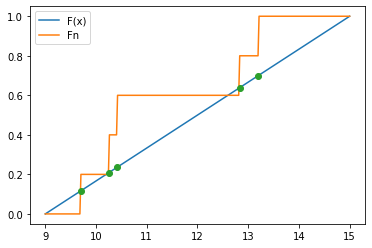

In [ ]:
import numpy as np
from scipy import stats as st
import scipy as sc
import matplotlib.pyplot as plt

#===================================
def my_kstest(data, cdf ):
    n = len(data)
    Fn = [k/n for k in range(n+1)]
    F = cdf(data)
    
    d1 = Fn[:-1] - F
    d2 =Fn[1:] - F
    d1_max = np.abs(d1).max()
    d2_max = np.abs(d2).max()
    _Dn = max(d1_max, d2_max)
    
    return _Dn

#============= ПРИМЕР 1 =======================
data =np.array(sc.sort([13.2, 9.7, 10.25, 12.83, 10.41]))
n = len(data)

a, b = 9, 15
cdf = lambda x: st.uniform.cdf(x, loc=a, scale=(b-a))

#Используем my_kstest:
Dn = my_kstest(data, cdf)
SDn = np.sqrt(n)*Dn

#Проверяем библиотечной функцией:
Dn1, _ = st.kstest(data, cdf)
SDn_test = np.sqrt(n)*Dn1

print('\nSDn:', SDn)
print('SDn test:', SDn_test)

# ----------- Рисуем -----------------
X = np.linspace(a, b,300)

plt.plot(X, cdf(X), label='F(x)')
cdf_n = sc.vectorize( lambda x: len(data[data < x])/n)
plt.plot(X, cdf_n(X), label='Fn')
plt.plot(data, cdf(data), 'o')
plt.legend();

###### Пример

На заводе измерили время, между поступлением заявок на ремонт оборудования в ремонтный цех. Всего выборка состоит из 10 наблюдений. 

0.25, 1.48, 0.32, 0.17, 1.66, 0.29, 0.02, 1.13, 0.12, 3.09

Требуется проверить гипотезу о том, что время между поступлениями заявок подчиняется экспоненциальному закону распределения с мат. ож. $a = 1$

$\xi \sim E(1) ?$


**Решение:**

Задача разбирается в [курсе](https://stepik.org/lesson/26280/step/10?unit=8173)

$E\xi = \frac{1}{\lambda}$

$H_0: \xi = E(1)$

$H_1: \xi \neq E(1)$


Составим вариационный ряд. Для каждого $x_{(i)}$ найдём теоритическое значение ф-и распределения $F_0(x_{(i)})$ и эмпирической $F^*(x_{(i)})$

Для того, чтобы вычислить выборочное значение статистики $D_n$ нам для каждого эл-та выборки надо сравнить значение теоритической ф-и распределения в соответствующей точке $F_0(x_{(i)})$ с значениями выборочной ф-и распределения в точках $F^*(x_{(i)})$ и  $F^*(x_{(i+1)})$.

In [ ]:
X = np.array([0.25, 1.48, 0.32, 0.17, 1.66, 0.29, 0.02, 1.13, 0.12, 3.09])
variation_range = np.sort(X)
n = len(X)

Вычислим теоритическое значение ф-и распр. $F_0(x_{(i)})$

In [ ]:
Ft = np.around( st.expon.cdf(variation_range, scale = 1/1), 2)
Ft

array([0.02, 0.11, 0.16, 0.22, 0.25, 0.27, 0.68, 0.77, 0.81, 0.95])

Вычислим эмпирическое значение ф-и распределения $F^*(x_{(i)})$

$F^*(x_{(i)}) = P(X_{[n]} < x_{(i)}) = \frac{m}{n}$, где

$X_{[n]}$ выборка

$m$ кол-во эл-ов выборки, которые соответствуют условию X_{[n]} < x_{(i)}

**Пример**

$F^*(0.02) = P(X_{[n]} < 0.02) = \frac{0}{10} = 0$

$F^*(0.11) = P(X_{[n]} < 0.11) = \frac{1}{10} = 0.1$

$F^*(0.16) = P(X_{[n]} < 0.16) = \frac{2}{10} = 0.2$

...

$F^*(0.95) = P(X_{[n]} < 0.95) = \frac{9}{10} = 0.9$

In [ ]:
Fe = [k/n for k in range(n)]
Fe

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

Получим таблицу

In [ ]:
pd.DataFrame({'variation_range': variation_range, 'F_theoretical': Ft, 'F_empirical': Fe}).T

,0,1,2,3,4,5,6,7,8,9
variation_range,0.02,0.12,0.17,0.25,0.29,0.32,1.13,1.48,1.66,3.09
F_theoretical,0.02,0.11,0.16,0.22,0.25,0.27,0.68,0.77,0.81,0.95
F_empirical,0.00,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90


Построим график, для наглядности

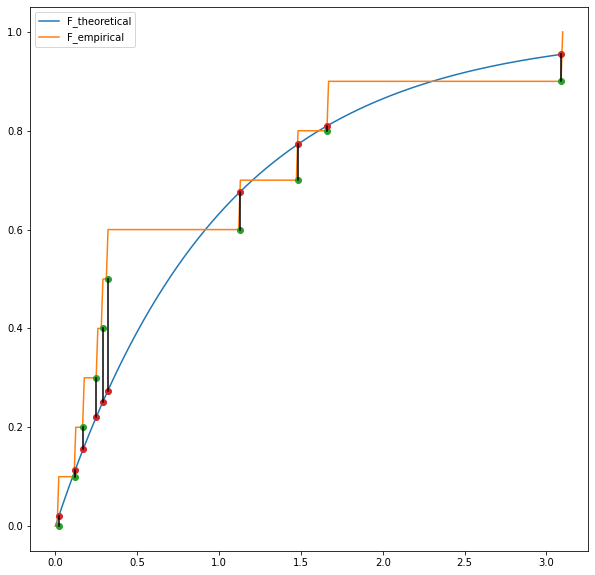

In [ ]:
import scipy as sc
plt.figure(figsize=(10,10))

n = len(variation_range)

X = np.linspace(0, 3.1, 300)
# построим теоритическую ф-ю экспоненциального распределения
cdf = lambda x: st.expon.cdf(x, scale = 1/1)
plt.plot(X, cdf(X), label='F_theoretical')
# построим эмпирическую ф-ю распределения
cdf_n = sc.vectorize( lambda x: len(variation_range[variation_range < x])/n)
plt.plot(X, cdf_n(X), label='F_empirical')
# зеленые точки, какие значения принимает эмпирическая ф-я распр.
plt.plot(variation_range, cdf_n(variation_range), 'o')
# красные точки, какие значения принимает теоритическая ф-я распр.
plt.plot(variation_range, cdf(variation_range), 'o')

# соединим две точки, которые показывают разницу эмпирической и теоритической ф-й
for i in range(n):
  x = [variation_range[i]] + [variation_range[i]]
  y = [cdf_n(variation_range)[i]] + [cdf(variation_range)[i]]
  plt.plot(x, y, '-', color='black')

plt.legend();

Для того, чтобы вычислить выборочное значение статистики $D_n$ нам для каждого эл-та выборки надо сравнить значение теоритической ф-и распределения в соответствующей точке $F_0(x_{(i)})$ с значениями выборочной ф-и распределения в точках $F^*(x_{(i)})$ и  $F^*(x_{(i+1)})$. Если $F_0(x_{(i)})$ последнее значение в массиве, то сравнить нужно с $F^*(x_{(i)})$ и  1.

In [ ]:
cdf = lambda x: np.around(st.expon.cdf(x, scale = 1/1), 2)

In [ ]:
def my_kstest(data, cdf):
    n = len(data)
    variation_range = np.sort(data)
    Fe = [k/n for k in range(n+1)]
    Ft = cdf(variation_range)
    
    d1 = np.abs(Fe[:-1] - Ft).max()
    d2 = np.abs(Fe[1:] - Ft).max()
    Dn = max(d1, d2)
    
    return round(Dn, 2)

In [ ]:
Dn = my_kstest(X, cdf)
Dn

0.33

Либо использовать готовую функцию из Scipy

In [ ]:
Dn1, _ = st.kstest(X, cdf)
Dn1

0.32999999999999996

Далее находим **выборочную статистику критерия** $\eta = \sqrt{n} D_n(X_{[n]})$

In [ ]:
eta = np.sqrt(n) * Dn
eta

1.0435516278555652

Зададим уровень значимости $\alpha = 0.05$. Найдём квантиль Колмогорова $d_{1 - \alpha}$

In [ ]:
alpha = 0.05
d = st.kstwobign.ppf(1 - alpha)
d

1.3580986393225505

$V_k = (1.36, + \infty)$

$\eta \notin V_k \Rightarrow H_0$ не отвергается. Можно считать, что время между заявками подчиняется экспонинциальному закону распределения.

**Ответ:**

$H_0$ не отвергается.

###### Задача №1

С помощью критерия Колмогорова проверьте  гипотезу о том, что объем шампуня в упаковке подчиняется нормальному закону распределения с мат. ожиданием 450  и дисперсией 16:

451 450 444 454 447

Найдите значение статистики критерия Колмогорова ($\sqrt{n}D_n$)

In [ ]:
X = np.array([451, 450, 444, 454, 447])
a = 450
D = 16
sigma = np.sqrt(D)
n = len(X)


Вычислим выборочный критерий Колмогорова $\eta = \sqrt{n}D_n$ используя Scipy

---



In [ ]:
cdf = lambda x: st.norm.cdf(x, loc = a, scale = sigma)
Dn, _ = st.kstest(X, cdf)
eta = np.sqrt(n) * Dn
eta

0.45010633921368626

Зададим уровень значимости $\alpha = 0.05$. Вычислим квантиль Колмогорова $d_{1 - \alpha}$, чтобы построить критическую область $V_k = (d_{1 - \alpha},+ \infty)$

In [ ]:
alpha = 0.05
d = st.kstwobign.ppf(1 - alpha)
d

1.3580986393225505

$V_k = (1.35, + \infty)$

$\eta \notin V_k \Rightarrow H_0$ не отвергается. Объем шампуня подчиняется нормальному закону распределения.

**Ответ:**

$\eta = \sqrt{n}D_n = 0.45$

$\eta \notin V_k \Rightarrow H_0$ не отвергается.



###### Задача №2

В течение недели Василий был вынужден ездить на работу на автобусе. Каждый раз Василий замерял, сколько времени ему приходилось ждать автобуса (мин): 13.0 9.8 10.2 12.9 10.4

Правда ли, что время ожидания автобуса Василием подчиняется равномерному на [9, 15] закону распределения.

Проверьте данную гипотезу с помощью критерия Колмогорова. Уровень значимости 0.01

**Решение:**

Гипотеза простая, так как нам известны параметры и по ним мы можем однозначно определить распределение. Требуется проверить гипотезу о том, является ли распределение равномерным или нет. Обозначим время ожидания автобуса, сл. вел. $\xi$

$H_0: F_{\xi} = U(9, 15)$

$H_1: F_{\xi} \neq U(9, 15)$

Равномерное распределение непрерывно и гипотеза простая, поэтому мы можем воспользоваться критерием Колмогорова.

$\eta = \sqrt{n} D_n(X_{[n]})$ 

$D_n(X_{[n]}) = \overset{}{\underset{x \in \mathbb R}{sup}} |F^*_n(x) - F_0(x)|$

Нам нужно узнать значения теоритической ф-и и имперической в точках из нашей выборки.

In [6]:
X = np.sort([13.0, 9.8, 10.2, 12.9, 10.4])
n = len(X)
a, b = 9, 15
cdf = lambda x: st.uniform.cdf(x, loc=a, scale=(b-a))
Dn, _ = st.kstest(X, cdf)
eta = np.sqrt(n) * Dn
eta

0.8198915917499228

$V_k = (d_{1 - \alpha}, + \infty)$, где

$d_{1 - \alpha}$ квантиль распределения Колмогорова.

В [Scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.kolmogorov.html) $stats.kstwobign.ppf(1 - alpha)$

In [10]:
alpha = 0.01
st.kstwobign.ppf(1 - alpha)

1.6276236115189502

$\eta = 0.82$ 

$V_k = (1.6, + \infty)$

$\eta \notin V_k \Rightarrow H_0$ не отклоняется. Значит ожидание автобуса на остановке подчиняется равномерному закону распределения $U(a, b)$

**Ответ:**

$\eta = 0.82$

$\eta \notin V_k \Rightarrow H_0$ не отклоняется. Значит ожидание автобуса на остановке подчиняется равномерному закону распределения $U(a, b)$

#### Критерий согласия для сложных гипотез

##### Гипотеза

Пусть ген. совокупность $\xi$, выборка $X_{[n]}$

$H_0: F_{\xi} \in (F(./\theta) : \theta \in \Theta \subset \mathbb R')$

$H_1: F_{\xi} \notin (F(./\theta) : \theta \in \Theta \subset \mathbb R')$

Разобъем множество значений $\xi$ на интервалы

$\Delta_1, ..., \Delta_k: \Delta_i = (a_{i - 1}, a_i], i = \overline {1,k}$

$F(x, \theta)$, где $\theta$ вектор неизвестных параметров.

$p_i(\theta) = P(\xi \in \Delta_i|H_0) = F(a_i, \theta) - F(a_{i-1}, \theta)$

$n_i = num(X_j \in \Delta_i)$, где

$n_i$ число эл-ов выборки попавшие в $\Delta_i$ интервал.

Критерий $\chi^2$ основан на сравнении наблюдаемых частот $\frac{n_i}{n}$ и вероятностей $p_i(\theta)$.

Мы можем найти оценки вероятностей $p_i$, найдя оценки параметра $\theta$.

Найдя оценки параметра $\theta$, мы сможем построить статистику критерия, статистику $\chi^2$.

Осталось только выяснить, какой закон распределения имеет данная статистика. 

##### Теорема Фишера

Пусть $\Theta$ открытое множество в $\mathbb R'$.

Пусть выполены условия:

1. Для любого $\theta \in \Theta: \sum \limits_{i=1}^k p_i = 1$
2. Для любого $\theta \in \Theta: p_i(\theta) > c > 0$ для любого $i = \overline {1,k}.$
3. Для любого $\theta \in \Theta$ существуют и непрерывны производные: $\frac{\delta p_i(\theta)}{\delta \theta_j}, \frac{\delta^2 p_i(\theta)}{\delta \theta_u \delta \theta_v}$ для любого $i = \overline {1,k}$, $u, v, j = 1,...l.$
4. Для любого $\theta \in \Theta$ матрица $\bigg ( \frac{\delta p_i(\theta)}{\delta \theta_j} \bigg )_{i, j = \overline {1,k}}$ имеет ранг $l$.

Пусть точесная оценка получена методом максимального правдоподобия

$\hat{\theta} =   \overset{}{\underset{\theta \in \Theta}{argmax}} L((n_i), \theta)$, где частоты $n_1, ..., n_k$ попадания в интервалы $\Delta_1, ..., \Delta_k$.

$L((n_i), \theta) = \frac{n!}{n_{1!} \cdot ... \cdot n_{k1}} \prod\limits_{i = 1}^k p^{n_i}_i (\theta)$ вычисляется как вероятность из полимиального распределения

или $\hat{\theta}$ - оценка по методу минимума хи-квадрат

$\hat{\theta} = \overset{}{\underset{\theta \in \Theta}{argmax}} \sum \limits_{i=1}^k \frac{(n_i - n p_i \theta))^2}{n p_i \theta)}$



##### Статистика критерия $\chi^2$

Тогда, если гипотеза $H_0$ верна, то

$\chi^2(\hat{\theta}) = \sum \limits_{i=1}^k \frac{(n_i - n p_i (\hat{\theta}))^2}{n p_i (\hat{\theta})} \xrightarrow[n \rightarrow \infty]{d} \zeta \sim \chi^2_{k - l - 1}$, где

$k$ кол-во интервалов

$l$ кол-во оцениваемых параметров распределения

##### Критическая область и p-value

$V_k = (\chi^2_{1 - \alpha, k- l - 1}, + \infty)$

$p_{value} = 1 - F_{\chi^2}(\chi^2(\hat{\theta}))$, где

$\chi^2(\hat{\theta})$ выборочная статистика критерия

$\hat{\theta}$ оценка параметра $\theta$ полученная путем максимального правдоподобия или по методу минимума хи-квадрат.

т.к. мы воспользовались ассимптотикой, то построенный критерий является приближенными и вероятность Ошибки I рода, будет немного отличатся от выбранного уровня значимости $\alpha$.

Стоит отметить, что критерий хи-квадрат является достаточно мощным критерием, применим как для непрерывных сл. вел. так и для дискретных сл. вел. Работает как с простыми гипотезами, так и со сложными. 

Однако у него есть недостатки. Разбиение на интервалы не заданы однозначно и различные разбиения могут привести к разным результатам. Так же не чувствителен к разнице на хвостах, т.е. на тех интервалах, где наблюдений мало и мы вынуждены объединять с соседними интервалами.

##### Задача №1

Используйте следующие  данные об отказах аппаратуры за 10000 часов работы для проверки гипотезы о том, что число отказов имеет распределение Пуассона:

$0, 1, 2, 3, 4, 5, \geq 6$ число отказов k

$427, 235, 72, 21, 1, 1, 0$ кол-во случаев с отказами

Проверьте гипотезу с помощью критерия хи-квадрат при уровне значимости 0.01.

Найдите оценку неизвестного параметра $\lambda$ с помощью метода максимального правдоподобия.

Найдите ожидаемое число приборов, имевших  3 отказа за 10000 часов работы. В качестве оценки параметра $\lambda$ возьмите значение, найденное в предыдущем задании (используем значение с точностью 1 знак после запятой).

Найдите выборочное значение статистики критерия.

Найдите квантиль распределения статистики критерия, участвующий в построении критической области, и примите статистическое решение.

**Решение:**

Найдем оценку $\hat{\theta}$ методом максимального правдоподобия. Для этого составим функцию потерь.

$L_X = \prod\limits_{i = 1}^n P(x_i = k) = \prod\limits_{i = 1}^n \frac{\lambda^k}{k!} e^{- \lambda} = \frac{\lambda^{\sum k}}{\prod\limits_{i = 1}^n k!} e^{-n \lambda}$

Составим логарифмическую ф-ю потерь

$l_x = ln(L_X) = ln( \frac{\lambda^{\sum k}}{\prod\limits_{i = 1}^n k!} e^{-n \lambda} ) = \sum k \cdot ln(\lambda) - n \cdot \sum ln(k!) - n\lambda$

Чтобы максимизировать функцию потерь, найдём маскимум, для этого найдем производную по искомому параметру $\lambda$

$ \frac{\delta }{\delta \lambda} (\sum k \cdot ln(\lambda) - n \cdot \sum ln(k!) - n\lambda) = \frac{\sum k}{\lambda} - n$

Запишем уравнение правдоподобия и выразим из него $\alpha$

$ \frac{\sum k}{\lambda} - n = 0 $

$ \alpha = \frac{\sum k}{n} $

$\alpha = \overline X$

Мы нашил оценку искомого параметра $\hat{\theta} = \alpha =  \overline X$.






Найдём $\overline X = \sum \limits_{i=0}^k \frac{x_i n_i }{n} $, где

$k$ кол-во значений принимающая сл. вел.

$n_i$ - кол-во случаев с отказами

$n$ - всего случаев с отказами

In [ ]:
X = np.array([0, 1, 2, 3, 4, 5, 6])
ni = np.array([427, 235, 72, 21, 1, 1, 0])
n = sum(N)
Xmean = round(sum(X * ni) / n, 2)
Xmean

0.6

Найдите ожидаемое число приборов, имевших  3 отказа за 10000 часов работы.

$P(X = k) = \frac{\lambda^k}{k!} e^{- \lambda}$

в качестве $\lambda$ возьмем оценку $\overline X = 0.6$

In [ ]:
p = Xmean ** 3 / math.factorial(3) * np.exp(- Xmean)

In [ ]:
count = p * n
count

14.956214706834405

Найдите выборочное значение статистики критерия

$\chi^2(\hat{\theta}) = \sum \limits_{i=1}^k \frac{(n_i - n p_i (\hat{\theta}))^2}{n p_i (\hat{\theta})}$, где

$\hat{\theta} = \hat{\lambda} = 0.6$

$n_i$ количество поломок попавших в $i$ интервал, т.к. у нас дискретное распределение, то вместо интервалов будут выборочные значения, т.е. $n_0 = 427, n_1 = 235$ и т.д.

$p_i$ вероятность иметь $i$ поломок, ищем по формуле $P(X = k) = \frac{\lambda^k}{k!} e^{- \lambda}$б где $k = i$, $k = \overline {1,6}$

$n$ общее ко-во случаев с отказами, $n = \sum \limits_{i=0}^6 n_i$

Необходимо так же проверить условие, чтобы $np_i \geq 5$, иначе нужно объединить интервалы, в нашем случае выборочные значения.

In [ ]:
# рассмотрим две реализации, с помощью итераций
[Xmean ** k / math.factorial(k) * np.exp(- Xmean) for k in X]

[0.5488116360940264,
 0.32928698165641584,
 0.09878609449692474,
 0.01975721889938495,
 0.002963582834907742,
 0.000355629940188929,
 3.55629940188929e-05]

In [ ]:
# с помощью map, создадим функцию и передадим её в map
function = lambda k: Xmean ** k / math.factorial(k) * np.exp(- Xmean)
list(map(function, X))

[0.5488116360940264,
 0.32928698165641584,
 0.09878609449692474,
 0.01975721889938495,
 0.002963582834907742,
 0.000355629940188929,
 3.55629940188929e-05]

Один тонкий момент, что по условию должно быть $\sum p_i = 1$, если мы будем считать так, как ниже, то в сумме у нас не будет единицы. Поэтому нужно посчитать вероятности $p_1, p_2, p_3, p_4, p_5$, а последнюю вероятность вычислить так $p_6 = 1 - (p_1 + p_2 + p_3 + p_4 + p_5)$

In [ ]:
def count_prob(X, Xmean, n):
  p = [Xmean ** k / math.factorial(k) * np.exp(- Xmean) for k in X[:-1]]
  p.append(1 - sum(p))
  assert sum(p) == 1 
  return np.array(p)

In [ ]:
pi = count_prob(X, Xmean, n)
pi

array([5.48811636e-01, 3.29286982e-01, 9.87860945e-02, 1.97572189e-02,
       2.96358283e-03, 3.55629940e-04, 3.88560782e-05])

$np_i \geq 5$

In [ ]:
[(i, n * p) for i, p in enumerate(pi)]

[(0, 415.450408523178),
 (1, 249.27024511390678),
 (2, 74.78107353417202),
 (3, 14.956214706834405),
 (4, 2.243432206025161),
 (5, 0.2692118647230192),
 (6, 0.029414051160656207)]

Видим, что последние 3 интервала не выполняют условия, необходимо их объединить, тогда будут такие массивы

In [ ]:
# было
# X = np.array([0, 1, 2, 3, 4, 5, 6])
# ni = np.array([427, 235, 72, 21, 1, 1, 0])

# стало
X = np.array([0, 1, 2, 3])
ni = np.array([427, 235, 72, 23])

# пересчитаем вероятности
pi = count_prob(X, Xmean, n)

# проверим, выполняется ли теперь условие
[(i, n * p) for i, p in enumerate(pi)]

[(0, 415.450408523178),
 (1, 249.27024511390678),
 (2, 74.78107353417202),
 (3, 17.498272828743218)]

$\chi^2(\hat{\theta}) = \sum \limits_{i=1}^k \frac{(n_i - n p_i (\hat{\theta}))^2}{n p_i (\hat{\theta})}$

In [ ]:
chi2 = np.sum((ni - n * pi)**2 / (n * pi))
chi2

2.9712796652079856

Найдите квантиль распределения статистики критерия, участвующий в построении критической области, и примите статистическое решение.

$V_k = (\chi^2_{1 - \alpha, k - l - 1}, + \infty)$

$k$ кол-во интервалов

$l$ кол-во оцениваемых параметров распределения, в нашем случае параметр один, это $\lambda$

In [ ]:
alpha = 0.01
k = 4
l = 1
st.chi2.ppf(1 - alpha, df=k-l-1)

9.21034037197618

$V_k = (9.21, + \infty)$

$\chi^2_в = 2.97$

$\chi^2_в \notin V_k \Rightarrow H_0$ не отвергается. 

**Ответ:**

$H_0$ не отвергается.

#### Задачи на данную тему

##### Задача №1

Рейтинг хлопьев

По предложенной выборке  агрегированных рейтингов  хлопьев на завтрак, выдвиньте и проверьте гипотезу о законе распределения рейтингов.

Представьте  графически исходные данные, а также данные, преобразованные с помощью натурального логарифма, и выдвините предположение о законе распределения, которому подчиняются агрегированные рейтинги хлопьев.

**Решение:**

Загрузим и построим графики

In [76]:
df = pd.read_csv('tcereals.txt', sep = '\t', error_bad_lines=False)
df.head()

,name,rating
0,100_Bran,68.402973
1,100_Natural_Bran,33.983679
2,All-Bran,59.425505
3,All-Bran_with_Extra_Fiber,93.704912
4,Almond_Delight,34.384843


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    77 non-null     object 
 1   rating  77 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.3+ KB


In [78]:
df.describe()

,rating
count,77.000000
mean,42.665705
std,14.047289
min,18.042851
25%,33.174094
50%,40.400208
75%,50.828392
max,93.704912


Построим графики нашей сл. вел. и прологорифмированной сл. вел. Видим, что графики одинаковы, ничего не изменилось, это означает, что ф-я распределения логнормальная. Другие распределения после логарифмирования изменяются.

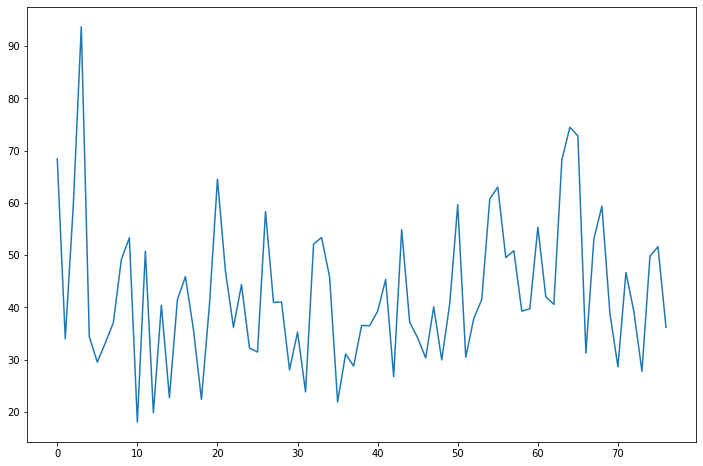

In [79]:
plt.figure(figsize=(12,8)) 
plt.plot(df.rating.values);

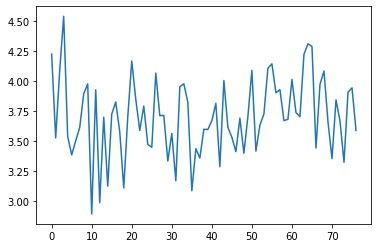

In [80]:
plt.plot(np.log(df.rating.values));

Другие распределения после логарифмирования изменяются. Для эксперимента возьмем распределение экспоненциальное и прологарифмируем его, увидим, что график поменялся.

In [75]:
t = np.random.exponential(5, size=100)

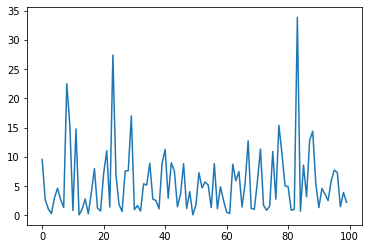

In [ ]:
plt.plot(t)

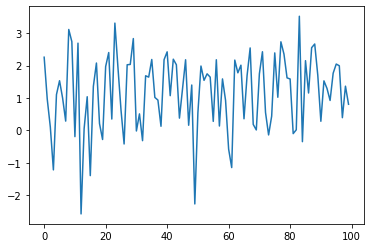

In [ ]:
plt.plot(np.log(t))

Хорошо видно на гистограмме, как после логарифмирования, наше распределение становится больше похоже на нормальное распределение.

(array([ 6., 14., 22., 11., 12.,  6.,  3.,  2.,  0.,  1.]),
 array([18.042851 , 25.6090571, 33.1752632, 40.7414693, 48.3076754,
        55.8738815, 63.4400876, 71.0062937, 78.5724998, 86.1387059,
        93.704912 ]),
 <a list of 10 Patch objects>)

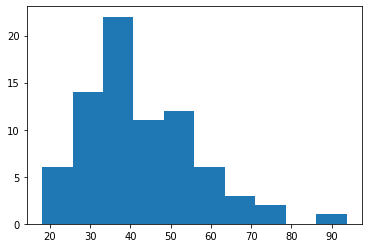

In [42]:
plt.hist(df.rating.values)

(array([ 2.,  4.,  6., 11., 21.,  9., 12.,  7.,  4.,  1.]),
 array([2.89274954, 3.05748965, 3.22222975, 3.38696986, 3.55170997,
        3.71645008, 3.88119018, 4.04593029, 4.2106704 , 4.3754105 ,
        4.54015061]),
 <a list of 10 Patch objects>)

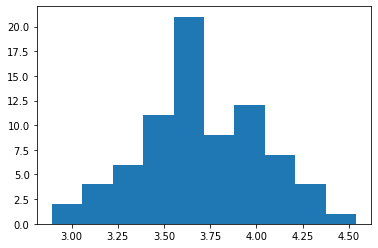

In [43]:
plt.hist(np.log(df.rating.values))

По предложенной выборке  агрегированных рейтингов  хлопьев на завтрак, проверьте гипотезу о законе распределения рейтингов, выдвинутую в предыдущем задании. Уровень значимости 0.03

Преобразуйте данные с помощью натурального логарифма и проверьте нулевую гипотезу с помощью нескольких критериев: Шапиро-Уилка, Андерсона-Дарлинга, Лилифорса.

Поставим гипотезу о том, что распределение является логнормальным, обратим внимание, что в задании нужно вычислить критерии для логарифмированных данных, которые являются нормально распределенными. Значение рейтинга обозначим сл. вел. $\xi$

$H_0: F_{\xi}(x) = LnN(a, \sigma)$

$H_1: F_{\xi}(x) \neq LnN(a, \sigma)$

Шапиро-Уилка

In [74]:
X = np.log(df.rating.values)
st.shapiro(X)

ShapiroResult(statistic=0.9942906498908997, pvalue=0.9828543066978455)

Андерсона-Дарлинга

In [81]:
AD, _, _ = st.anderson(X, dist='norm')

In [82]:
if AD >= .6:
    p = math.exp(1.2937 - 5.709*AD - .0186*(AD**2))
elif AD >=.34:
    p = math.exp(.9177 - 4.279*AD - 1.38*(AD**2))
elif AD >.2:
    p = 1 - math.exp(-8.318 + 42.796*AD - 59.938*(AD**2))
else:
    p = 1 - math.exp(-13.436 + 101.14*AD - 223.73*(AD**2))
print("p = ", p)

p =  0.911868575171676


Лилифорса

In [122]:
# из этой билиотеки критерий не работает
from statsmodels.stats.diagnostic import lilliefors
lilliefors(X)

В итоге вычислил по [ссылке](https://rdrr.io/snippets/) из комментариев к [заданию](https://stepik.org/lesson/28355/step/3?unit=9524)

In [ ]:
library(nortest)
data<- c(4.22541629, 3.52588038, сюда все данные скопировать) 
ad.test(data)

lillie.test(data)             

**Ответ:**

$\alpha = 0.01$

т.к. все 

$p_{value} > \alpha \Rightarrow H_0$ не отвергается. Значит наши данные имеют логнормальное распределение.

##### Задача №2